In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request
import io
import numpy as np

def download_and_read_data():
    """
        Tải và đọc dữ liệu từ mạng xã hội Facebook (từ SNAP)
    """
    url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
    response = urllib.request.urlopen(url)
    data = response.read()
    
    # Giai nen file
    df = pd.read_csv(io.BytesIO(data),
                    compression='gzip',
                    sep=" ",
                    names=["source", "target"])
    return df

In [3]:
def calculate_all_metrics(G):
    """
        Tính toán tất cả các số đo của đồ thị
        Args:
            G: Đồ thị NetworkX
        Returns:
            dict: Dictionary chứa các số đo của đồ thị
    """
    metrics = {}
    # 1. Thông tin cơ bản
    metrics['nodes'] = G.number_of_nodes()
    # |V|: Số lượng đỉnh trong đồ thị

    metrics['edges'] = G.number_of_edges()
    # |E|: Số lượng cạnh trong đồ thị

    metrics['density'] = nx.density(G)
    # Mật độ đồ thị
    # Công thức: D = 2|E| / (|V|(|V|-1))
    # Trong đó:
    # - |E|: số cạnh thực tế
    # - |V|(|V|-1): số cạnh tối đa có thể có trong đồ thị vô hướng

    metrics['average_degree'] = np.mean([d for n, d in G.degree()])

    # 2. Degree metrics
    degrees = dict(G.degree())
    metrics['avg_degree'] = sum(degrees.values()) / len(degrees)
    # Degree trung bình
    # Công thức: <k> = (1/|V|) * Σ ki
    # Trong đó:
    # - |V|: số lượng đỉnh
    # - ki: degree của đỉnh i
    # Note: Trong đồ thị vô hướng: <k> = 2|E|/|V|

    metrics['max_degree'] = max(degrees.values())
    metrics['degrees'] = degrees

    # 3. Degree Centrality
    dc = nx.degree_centrality(G)
    metrics['degree_centrality'] = {
        'values': dc,
        'max': max(dc.values()),
        'avg': sum(dc.values()) / len(dc),
        'node_max': max(dc, key=dc.get)
    }
    # Degree Centrality
    # Công thức: CD(v) = deg(v)/(|V|-1)
    # Trong đó:
    # - deg(v): degree của đỉnh v
    # - |V|-1: số lượng kết nối tối đa có thể có của một đỉnh

    # 4. Betweenness Centrality
    bc = nx.betweenness_centrality(G)
    metrics['betweenness_centrality'] = {
        'values': bc,
        'max': max(bc.values()),
        'avg': sum(bc.values()) / len(bc),
        'node_max': max(bc, key=bc.get)
    }
    # Betweenness Centrality
    # Công thức: CB(v) = Σ (σst(v)/σst)
    # Trong đó:
    # - σst: số đường đi ngắn nhất từ đỉnh s đến đỉnh t
    # - σst(v): số đường đi ngắn nhất từ s đến t đi qua v
    # - Tổng được tính trên mọi cặp đỉnh s,t khác v

    # 5. Closeness Centrality
    cc = nx.closeness_centrality(G)
    metrics['closeness_centrality'] = {
        'values': cc,
        'max': max(cc.values()),
        'avg': sum(cc.values()) / len(cc),
        'node_max': max(cc, key=cc.get)
    }
    # Closeness Centrality
    # Công thức: CC(v) = (|V|-1) / Σ d(v,u)
    # Trong đó:
    # - |V|-1: số đỉnh khác v
    # - d(v,u): độ dài đường đi ngắn nhất từ v đến u
    # - Tổng được tính trên mọi đỉnh u khác v

    # 6. PageRank
    pr = nx.pagerank(G, alpha=0.85)
    metrics['pagerank'] = {
        'values': pr,
        'max': max(pr.values()),
        'avg': sum(pr.values()) / len(pr),
        'node_max': max(pr, key=pr.get)
    }
    # PageRank
    # Công thức: PR(v) = (1-d) + d * Σ (PR(u)/OutDegree(u))
    # Trong đó:
    # - d: damping factor (thường = 0.85)
    # - PR(u): PageRank của các đỉnh u kề với v
    # - OutDegree(u): bậc ra của đỉnh u
    # - Tổng được tính trên mọi đỉnh u kề với v

    return metrics

In [4]:
def print_detailed_results(metrics):
    """
    In kết quả chi tiết của các phép đo
    """
    print("\n======== PHÂN TÍCH MẠNG XÃ HỘI ========= ")
    print("1. Thông tin cơ bản")
    print(f"- Số lượng nodes (người dùng): {metrics['nodes']}")
    print(f"- Số lượng cạnh (kết nối): {metrics['edges']}")
    print(f"- Mật độ: {metrics['density']}")
    print(f"- Degree trung bình: {metrics['average_degree']}")
    print(f"- Degree lớn nhất: {metrics['max_degree']}")

    centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

    print("2. Các số đo Centrality")
    for name, measure in centrality_measures.items():
        print(f"- {name}")
        print(f"- Giá trị lớn nhất: {metrics[measure]['max']:.4f}")
        print(f"- Giá trị trung bình: {metrics[measure]['avg']:.4f}")
        print(f"- Node có giá trị cao nhất: {metrics[measure]['node_max']}")

In [7]:
df = download_and_read_data()
df.head()
G = nx.from_pandas_edgelist(df, "source", "target")
metrics = calculate_all_metrics(G)
print_detailed_results(metrics)


======== PHÂN TÍCH MẠNG XÃ HỘI ========= 
1. Thông tin cơ bản
- Số lượng nodes (người dùng): 4039
- Số lượng cạnh (kết nối): 88234
- Mật độ: 0.010819963503439287
- Degree trung bình: 43.69101262688784
- Degree lớn nhất: 1045
2. Các số đo Centrality
- Degree Centrality
- Giá trị lớn nhất: 0.2588
- Giá trị trung bình: 0.0108
- Node có giá trị cao nhất: 107
- Betweenness Centrality
- Giá trị lớn nhất: 0.4805
- Giá trị trung bình: 0.0007
- Node có giá trị cao nhất: 107
- Closeness Centrality
- Giá trị lớn nhất: 0.4597
- Giá trị trung bình: 0.2762
- Node có giá trị cao nhất: 107
- PageRank
- Giá trị lớn nhất: 0.0076
- Giá trị trung bình: 0.0002
- Node có giá trị cao nhất: 3437


Yêu cầu
1. Xây dựng phương thức: visualize_metrics trực quan hóa các số đo bằng biểu đồ
Tạo figure với 2x2 subplots:

    1. Degree Distribution
    2. Centrality Comparison
    3. Top nodes comparison ....
2. Từ các số đo hãy đưa ra nhận định cơ bản về mạng xã hội
3. Thay đổi cách download dữ liệu trực tiếp thành việc đọc dữ liệu từ file:
    + File lưu trữ trên Google Drive (Dành cho Google Colab)
    + File lưu trữ trên trực tiếp trên máy

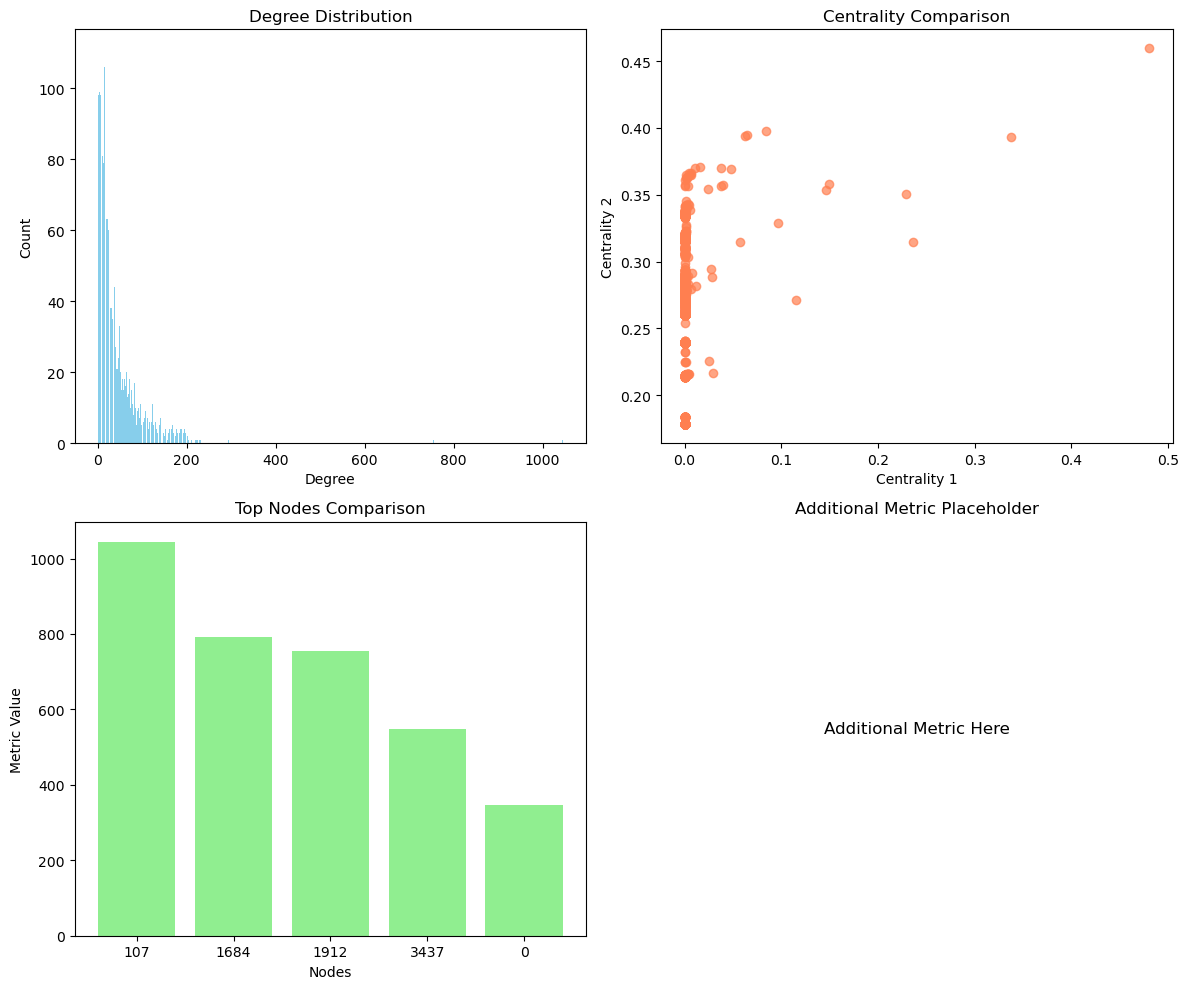

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_metrics(graph, degree_data, centrality_data, top_nodes):
    """
    Visualize network metrics using 2x2 subplots.

    Parameters:
    - graph: NetworkX graph
    - degree_data: Dictionary of degree distribution
    - centrality_data: Dictionary with keys ('centrality_1', 'centrality_2') for centrality comparisons
    - top_nodes: List of top nodes data for comparison
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Degree Distribution
    axs[0, 0].bar(degree_data.keys(), degree_data.values(), color='skyblue')
    axs[0, 0].set_title("Degree Distribution")
    axs[0, 0].set_xlabel("Degree")
    axs[0, 0].set_ylabel("Count")

    # Centrality Comparison
    axs[0, 1].scatter(
        centrality_data['centrality_1'].values(),
        centrality_data['centrality_2'].values(),
        alpha=0.7, c='coral'
    )
    axs[0, 1].set_title("Centrality Comparison")
    axs[0, 1].set_xlabel("Centrality 1")
    axs[0, 1].set_ylabel("Centrality 2")

    # Top Nodes Comparison
    axs[1, 0].bar(
        range(len(top_nodes)), 
        [data[1] for data in top_nodes],
        tick_label=[data[0] for data in top_nodes],
        color='lightgreen'
    )
    axs[1, 0].set_title("Top Nodes Comparison")
    axs[1, 0].set_xlabel("Nodes")
    axs[1, 0].set_ylabel("Metric Value")

    axs[1, 1].text(0.5, 0.5, "Additional Metric Here", 
                   ha='center', va='center', fontsize=12)
    axs[1, 1].set_title("Additional Metric Placeholder")
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Đọc file thành dataframe
file_path = 'data/facebook_combined.txt'
df = pd.read_csv(file_path, sep=' ', header=None, names=['Node1', 'Node2'])

G = nx.from_pandas_edgelist(df, source='Node1', target='Node2')
degree_distribution = {deg: count for deg, count in enumerate(nx.degree_histogram(G)) if count > 0}
centrality_comparison = {
    'centrality_1': nx.betweenness_centrality(G),
    'centrality_2': nx.closeness_centrality(G)
}
top_nodes_comparison = sorted(nx.degree(G), key=lambda x: x[1], reverse=True)[:5]

visualize_metrics(G, degree_distribution, centrality_comparison, top_nodes_comparison)
